In [1]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
import glob
import re
import sys
#from scipy.stats import gaussian_kde

### Read in full catalog

In [3]:
dtype = np.dtype([('id', int), ('mag', float), ('err', float), ('chi', float), ('sharp', float)])
F125W = np.loadtxt('../f125w_all_alf.raw.new', dtype=dtype, usecols=(0,5,6,7,8), skiprows=3)
F160W = np.loadtxt('../f160w_all_alf.raw.new', dtype=dtype, usecols=(0,5,6,7,8), skiprows=3)

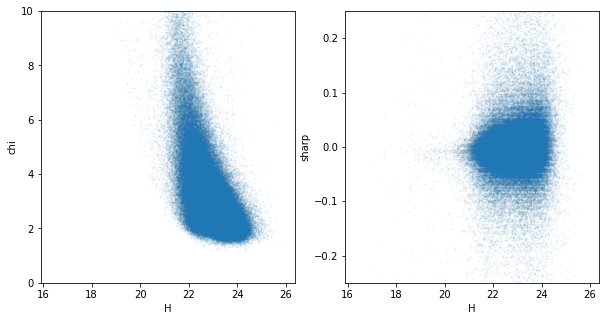

In [4]:
fig = mp.figure(figsize=(10,5))
ax1 = mp.subplot(121)
ax2 = mp.subplot(122)
ax1.scatter(F160W['mag'], F160W['chi'], s=1, edgecolor=None, alpha=0.05)
ax2.scatter(F160W['mag'], F160W['sharp'], s=1, edgecolor=None, alpha=0.05)
ax2.set_ylim((-0.25,0.25))
ax1.set_ylim((0,10))
ax1.set_xlabel('H')
ax1.set_ylabel('chi')
ax2.set_ylabel('sharp')
ax2.set_xlabel('H')
mp.show()

### CMD

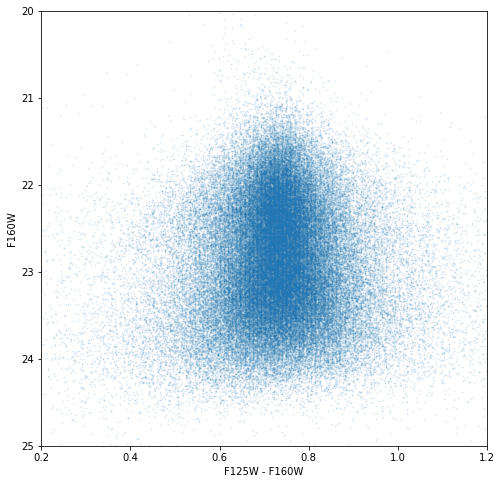

In [68]:
good = (np.abs(F160W['sharp']) < 0.05) & (F160W['chi'] < 6)
x = F125W['mag'][good] - F160W['mag'][good]
y = F160W['mag'][good]

#xy = np.vstack([x,y])
#z = gaussian_kde(xy)(xy)
#print 'finished density calc'
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

fig = mp.figure(figsize=(8,8))
ax1 = mp.subplot(111)
ax1.set_xlabel('F125W - F160W')
ax1.set_ylabel('F160W')
#good = (np.abs(F160W['sharp']) < 0.05) & (F160W['chi'] < 6)
#ax1.scatter(x, y, c=z, s=50, edgecolor='')
#ax1.hist2d(F125W['mag'] - F160W['mag'], F125W['mag'], bins=(100, 100), range=((0.25,1),(21,25)), cmap=mp.cm.Greys)
#ax1.hist2d(x, y, bins=(100, 100), range=((0.5,1),(21,25)), cmap=mp.cm.Greys)
#ax1.scatter(F125W['mag'] - F160W['mag'], F160W['mag'], color='k', s=1, alpha=0.1, edgecolor=None)
ax1.scatter(F125W['mag'][good] - F160W['mag'][good], F160W['mag'][good], s=1, alpha=0.1, edgecolor=None)
#ax1.scatter(Jmag - Hmag, Hmag, color='b', s=2, alpha=0.5, edgecolor=None)
#ax1.scatter(Jmag[Hbest] - Hmag[Hbest], Hmag[Hbest], color='xkcd:orange', s=2, alpha=0.5, edgecolor=None)
ax1.set_ylim((25,20))
ax1.set_xlim((0.2,1.2))
mp.show()

### Read in data file with average mags

In [96]:
dtype = np.dtype([('name', int), ('filter', 'S5'), ('period', float),
    ('avg', float), ('err', float), ('amp', float), ('dm', float),
    ('qual', int), ('gof', float)])
data = np.loadtxt('../average-mags.dat', dtype=dtype)

J = data['filter'] == 'F125W'
H = data['filter'] == 'F160W'

Jmag = data['avg'][J]
Jamp = data['amp'][J]
Jper = data['period'][J]
Jqual = data['qual'][J]
Jgof = data['gof'][J]
Jdm = data['dm'][J]
Hmag = data['avg'][H]
Hamp = data['amp'][H]
Hper = data['period'][H]
Hqual = data['qual'][H]
Hgof = data['gof'][H]
Hdm = data['dm'][H]
amp_ratio = Jamp/Hamp

print '{} total stars'.format(len(Hmag))
print '{} stars with likely bad periods'.format(len(Hqual[Hqual == 1]))

7368 total stars
4215 stars with likely bad periods


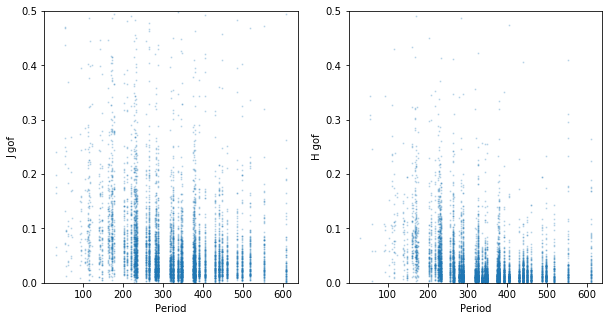

In [95]:
fig = mp.figure(figsize=(10,5))
ax1 = mp.subplot(122)
ax1.set_xlabel('Period')
ax1.set_ylabel('H gof')
ax1.scatter(Hper, Hgof, s=1, edgecolor=None, alpha=0.2)
#ax1.scatter(Hper[Hbest], Hgof[Hbest], s=1, edgecolor=None, alpha=0.2)
ax1.set_ylim((0,0.5))
ax2 = mp.subplot(121)
ax2.set_xlabel('Period')
ax2.set_ylabel('J gof')
ax2.scatter(Jper, Jgof, s=1, edgecolor=None, alpha=0.2)
#ax2.scatter(Jper[Jbest], Jgof[Jbest], s=1, edgecolor=None, alpha=0.2)
ax2.set_ylim((0,0.5))
mp.show()

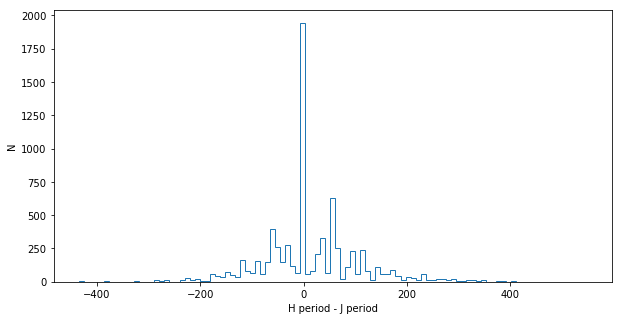

In [71]:
fig = mp.figure(figsize=(10,5))
ax1 = mp.subplot(111)
ax1.set_xlabel('H period - J period')
ax1.set_ylabel('N')
#ax1.scatter(Hper-Jper, Hmag, s=1, edgecolor=None, alpha=0.2)
ax1.hist(Hper-Jper, bins='auto', histtype='step')
#ax1.set_xlim((-1,1))
mp.show()

### Selection Criteria

In [60]:
# select stars with small difference in calculated period between bands, a period short enough to be measured 
# in the observation window, and well fit by a sine wave
Jbest = (np.abs(Hper - Jper) < 1) & (Jqual == 0) & (Jgof < 0.05)
Hbest = (np.abs(Hper - Jper) < 1) & (Hqual == 0) & (Hgof < 0.05)

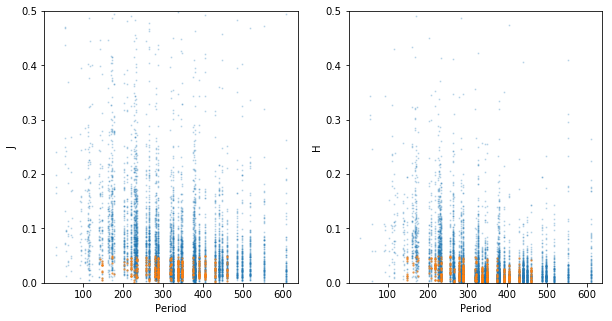

In [61]:
fig = mp.figure(figsize=(10,5))
ax1 = mp.subplot(122)
ax1.set_xlabel('Period')
ax1.set_ylabel('H')
ax1.scatter(Hper, Hgof, s=1, edgecolor=None, alpha=0.2)
ax1.scatter(Hper[Hbest], Hgof[Hbest], s=2, edgecolor=None, alpha=0.5)
ax1.set_ylim((0,0.5))
ax2 = mp.subplot(121)
ax2.set_xlabel('Period')
ax2.set_ylabel('J')
ax2.scatter(Jper, Jgof, s=1, edgecolor=None, alpha=0.2)
ax2.scatter(Jper[Jbest], Jgof[Jbest], s=2, edgecolor=None, alpha=0.5)
ax2.set_ylim((0,0.5))
mp.show()

### Amplitude Histograms

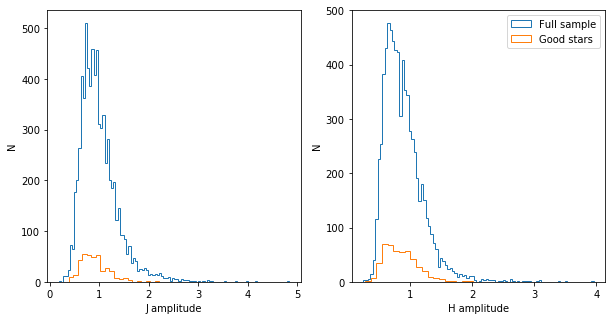

In [72]:
fig = mp.figure(figsize=(10,5))
ax2 = mp.subplot(122)
ax2.set_xlabel('H amplitude')
ax2.set_ylabel('N')
ax2.hist(Hamp, bins='auto', histtype='step', label='Full sample')
ax2.hist(Hamp[Hbest], bins='auto', histtype='step', label='Best stars')
ax2.legend()

ax1 = mp.subplot(121)
ax1.set_xlabel('J amplitude')
ax1.set_ylabel('N')
ax1.hist(Jamp, bins='auto', histtype='step')
ax1.hist(Jamp[Jbest], bins='auto', histtype='step')

mp.show()

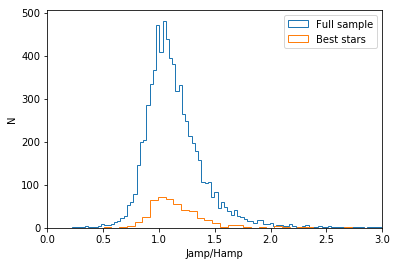

In [73]:
#amplitude ratio
fig = mp.figure()
ax1 = mp.subplot(111)
ax1.set_ylabel('N')
ax1.set_xlabel('Jamp/Hamp')
ax1.hist(amp_ratio, bins='auto', histtype='step', label='Full sample')
ax1.hist(amp_ratio[Hbest], bins='auto', histtype='step', label='Best stars')
ax1.set_xlim((0,3))
ax1.legend()

mp.show()

### PL relationship

NGC 4258 distance modulus using Kanbur relaitons: 35.93
NOTE: no extinction corrections have been applied!


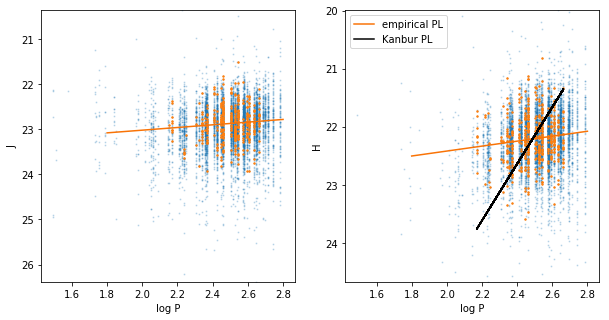

In [83]:
# period-luminosity relations

#fit_J_all = np.polyfit(np.log10(Jper), Jmag, 1)
fit_J_best = np.polyfit(np.log10(Jper[Jbest]), Jmag[Jbest], 1)
x = np.array([1.8,2.8])
#y_J_all = fit_J_all[0]*x + fit_J_all[1]
y_J_best = fit_J_best[0]*x + fit_J_best[1]
#fit_H_all = np.polyfit(np.log10(Hper), Hmag, 1)
fit_H_best = np.polyfit(np.log10(Hper[Hbest]), Hmag[Hbest], 1)
#y_H_all = fit_H_all[0]*x + fit_H_all[1]
y_H_best = fit_H_best[0]*x + fit_H_best[1]

## Kanbur H band PL relation
y = -2.12*np.log(Hper[Hbest]) + 16.93 - 18.50
dm = np.average(Hmag[Hbest] - y)
y_emp = y + dm
print 'NGC 4258 distance modulus using Kanbur relaitons: {:.2f}'.format(dm)
print 'NOTE: no extinction corrections have been applied!'

fig = mp.figure(figsize=(10,5))
ax2 = mp.subplot(122)
ax2.set_xlabel('log P')
ax2.set_ylabel('H')
#mp.hist2d(np.log10(Hper), Hmag, bins=(50,50), cmap=mp.cm.jet)
ax2.scatter(np.log10(Hper), Hmag, s=1, edgecolor=None, alpha=0.2)
ax2.scatter(np.log10(Hper[Hbest]), Hmag[Hbest], s=2, edgecolor=None)
y = -3.15*x - 19.06 + 18.50 + 29.2
#ax2.plot(x, y_H_all, 'b')
ax2.plot(x, y_H_best, 'xkcd:orange', label='empirical PL')
ax2.plot(np.log10(Hper[Hbest]), y_emp, 'k', label='Kanbur PL')
#ax2.plot(x, y, 'k')
ax2.set_ylim((np.max(Hmag), np.min(Hmag)))
ax2.legend()

ax1 = mp.subplot(121)
ax1.set_xlabel('log P')
ax1.set_ylabel('J')
ax1.scatter(np.log10(Jper), Jmag, s=1, edgecolor=None, alpha=0.2)
ax1.scatter(np.log10(Jper[Jbest]), Jmag[Jbest], s=2, edgecolor=None)
x = np.array([1.8, 2.8])
y = -2.92*x - 19.37 + 18.50 + 29.2
#ax1.plot(x, y, 'k')
#ax1.plot(x, y_J_all, 'b')
ax1.plot(x, y_J_best, 'xkcd:orange')
ax1.set_ylim((np.max(Jmag), np.min(Jmag)))

mp.show()

### Period - color

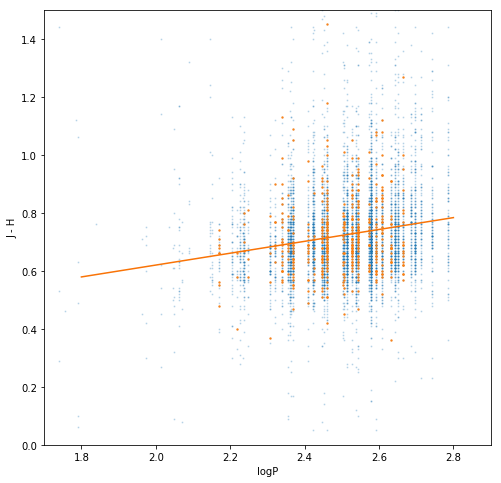

In [94]:
fit_all = np.polyfit(np.log10(Hper), Jmag-Hmag, 1)
fit_best = np.polyfit(np.log10(Hper[Hbest]), Jmag[Hbest]-Hmag[Hbest], 1)
x = np.array([1.8,2.8])
y_all = fit_all[0]*x + fit_all[1]
y_best = fit_best[0]*x + fit_best[1]

fig = mp.figure(figsize=(8,8))
ax1 = mp.subplot(111)
ax1.set_xlabel('logP')
ax1.set_ylabel('J - H')
ax1.scatter(np.log10(Hper), Jmag-Hmag, s=1, edgecolor=None, alpha=0.2)
#ax1.plot(x, y_all, 'b')
ax1.plot(x, y_best, 'xkcd:orange')
ax1.scatter(np.log10(Hper[Hbest]), Jmag[Hbest]-Hmag[Hbest], s=2, edgecolor=None, alpha=0.8)
ax1.set_ylim((0,1.5))
ax1.set_xlim((1.7,2.9))
mp.show()